# Windowing Procedure

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
import functionsMasterProjectMeinhart as fmpm

## Loading some data

In [2]:
# select file (csv)
file_dir  = r'E:\Physio_Data\Subject_01'
file_name = 'subject01.csv'

# selecet time range [min:sec]
#start_min_sec = '02:20.0' # Raises Oblique
#stop_min_sec  = '02:37.1'

# Let's take the first 10 min, after filtering we split into 5 s windows
# selecet time range [min:sec]
start_min_sec = '02:15.0'
stop_min_sec  = '02:25.0'

sampling_rate = 256 # [Hz]

# split time string and convert to float
start_min = float(start_min_sec.split(':')[0])
start_sec = float(start_min_sec.split(':')[1])
stop_min = float(stop_min_sec.split(':')[0])
stop_sec = float(stop_min_sec.split(':')[1])

# start and stop time in seconds
start_time = start_min*60 + start_sec # [s]
stop_time = stop_min*60 + stop_sec # [s]

# join data path
data_path = os.path.join(file_dir, file_name)

# get data from selected file
sensor_data = fmpm.get_sensor_data(in_file=data_path,
                                   sampling_rate=sampling_rate,
                                   start_time=start_time,
                                   stop_time=stop_time)

# filter properties according to Crema
cutoff = 10 # [Hz]
order = 6 # butterworth order

# filter data with butterworth filter and save to new dictionary
signal_keys = ['Acc', 'Gyr']
sensor_data_filt = {}
sensor_data_filt['time'] = sensor_data['time']
for signal in signal_keys:
    sensor_data_filt[signal] = fmpm.butter_lowpass_filter(sensor_data[signal], 
                                                          cutoff=cutoff, 
                                                          fs=sampling_rate, 
                                                          order=order)

## Generate the animation of the windowing procedure


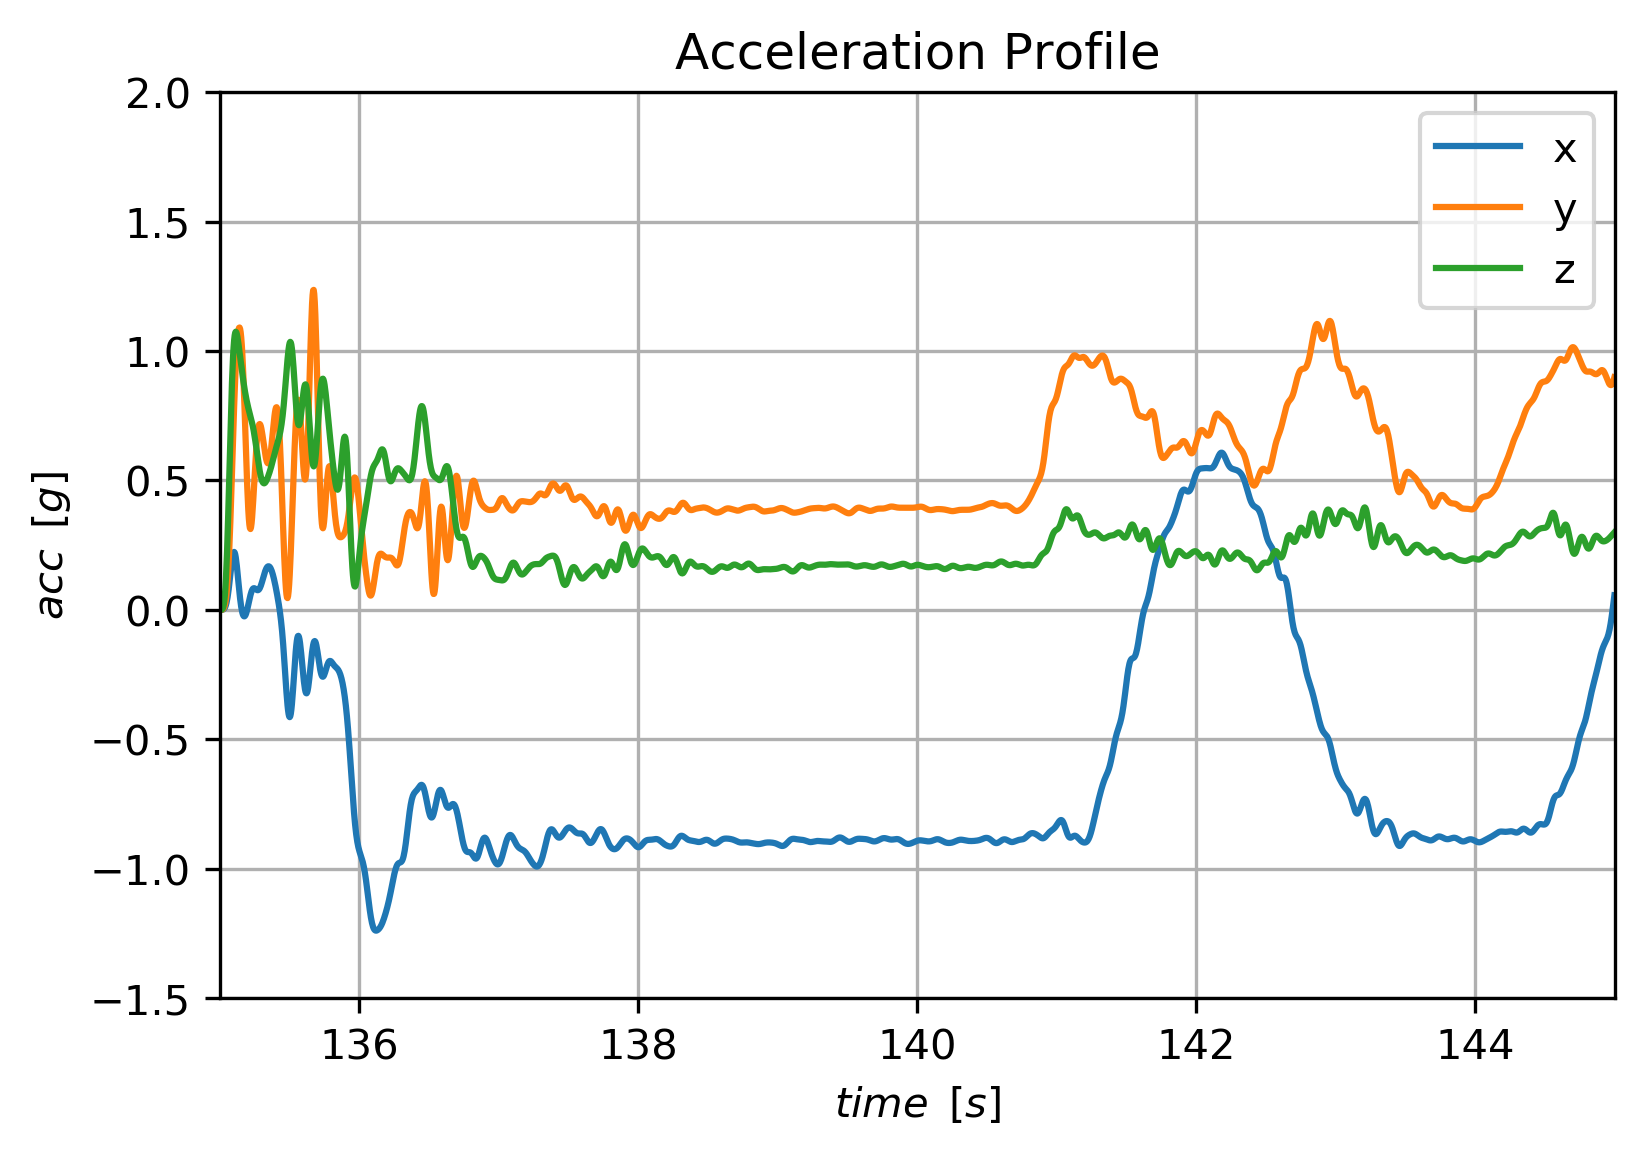

In [3]:

X_MIN = 136
X_MAX = 145
Y_MIN = -1.5
Y_MAX = 2


fig = plt.figure(dpi=300)
ax1 = plt.axes(xlim=(135, 145), ylim=(-1.5, 2))
line, = ax1.plot([], [], lw=2)

fmpm.plot_signal(sensor_data_filt['Acc'],sensor_data_filt['time'],legend_loc='upper right')

lines = []
for index in range(11):
    lobj = ax1.plot([],[],lw=2,color='r')[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
    return lines

x_line_vals = []

frame_num = 300

def animate(i):
    
    start_time = int(i/20)*0.2
    
    end_time = 1 + 0.2*(i%20)
    
    x_vals = np.linspace(0,end_time,11) + X_MIN + start_time

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data([x_vals[lnum], x_vals[lnum]], [Y_MIN, Y_MAX]) # set data for each line separately. 

    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frame_num, interval=10, blit=True)
anim.save('basic_animation_fps3.mp4', fps=3, extra_args=['-vcodec', 'libx264'])

#anim = animation.FuncAnimation(fig, animate, frames=np.arange(0,120), interval=300)
#anim.save('windowing_procedure.gif', dpi=200, writer='imagemagick')
plt.show()